# **DATA PREPROCESSING**

In [32]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('reddit_preprocessing.csv')
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [3]:
df.shape

(36793, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36793 entries, 0 to 36792
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36662 non-null  object
 1   category       36793 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 575.0+ KB


In [8]:
df.isnull().sum()

clean_comment    131
category           0
dtype: int64

In [12]:
df[df['clean_comment'].isnull()]

,clean_comment,category
287,NaN,0
821,NaN,0
922,NaN,0
934,NaN,0
1169,NaN,0
...,...,...
36358,NaN,0
36563,NaN,0
36599,NaN,0
36731,NaN,0


In [18]:
df.dropna(inplace=True)
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [20]:
df.duplicated().sum()
df[df.duplicated()]

,clean_comment,category
1376,jpg,0
1397,good,1
1430,real bhagoda,1
1561,think,0
2340,cringe,0
...,...,...
36751,nice try,1
36768,vote,0
36770,would,0
36776,nice try,1


In [27]:
df[(df['clean_comment'].str.strip() == ' ')].sum()

clean_comment    0
category         0
dtype: object

In [24]:
#converting all data in lower case
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [26]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))].sum()

clean_comment    0
category         0
dtype: object

In [29]:
# intentifying comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comment_with_url = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

comment_with_url.sum()

clean_comment    0
category         0
dtype: object

In [30]:
# identifying comments contaning new line chahcters
comment_with_newline = df[df['clean_comment'].str.contains('\n')]
comment_with_newline.sum()

clean_comment    0
category         0
dtype: object

In [31]:
# remove newline comment from clean comment
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)
comment_with_newline_remaining = df['clean_comment'].str.contains("\n")
comment_with_newline_remaining.sum()

np.int64(0)

# **EDA**

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='category', ylabel='count'>

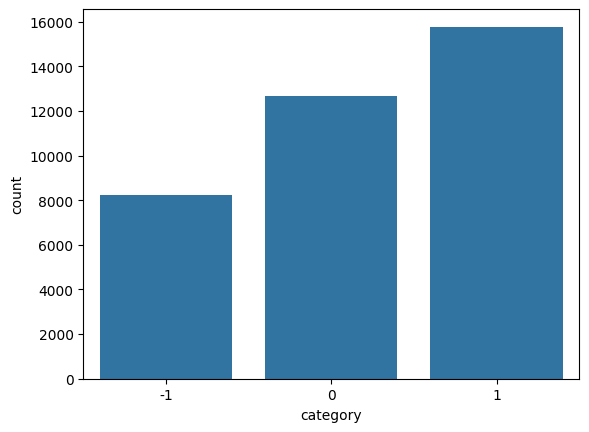

In [39]:
sns.countplot(data=df, x="category")

In [40]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    43.01
 0    34.49
-1    22.50
Name: proportion, dtype: float64

In [42]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.sample(5)

,clean_comment,category,word_count
1887,like koffie reo coker interacting,0,5
26683,gross exaggeration india nothing significant s...,1,6
25417,serf dipshit right supporter believe ram rajya...,1,13
20204,tamil nadu,0,2
2572,ironic exact moment reading guy sitting next m...,1,15


In [44]:
df['word_count'].describe()

count    36662.000000
mean        20.162048
std         39.124786
min          1.000000
25%          5.000000
50%          9.000000
75%         20.000000
max        893.000000
Name: word_count, dtype: float64

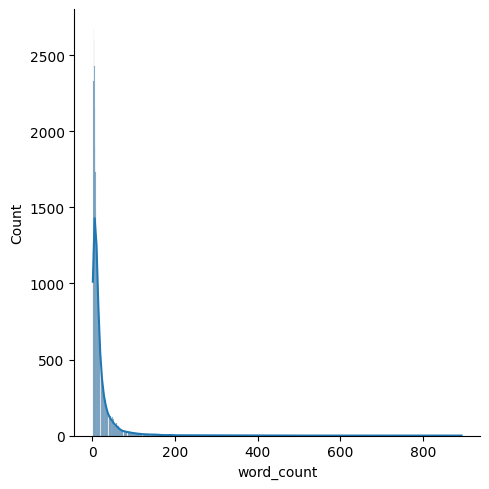

In [46]:
sns.displot(df['word_count'], kde=True)

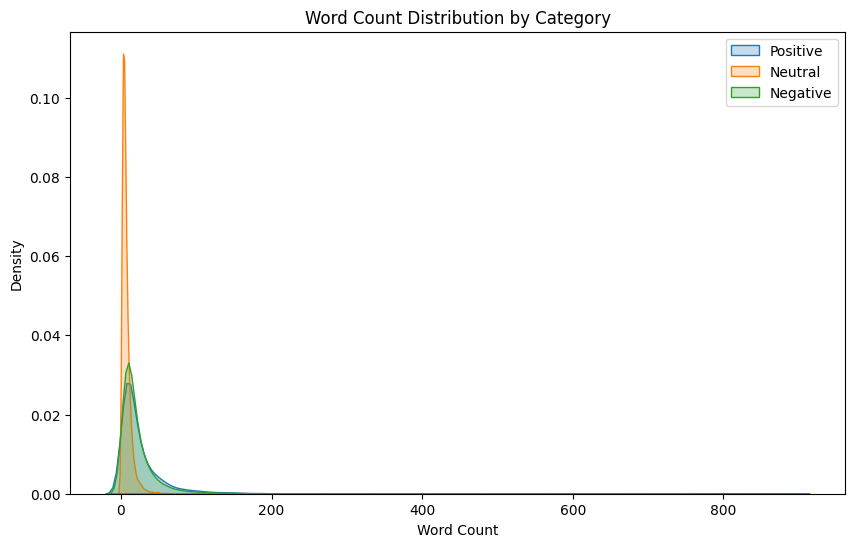

In [47]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_count'>

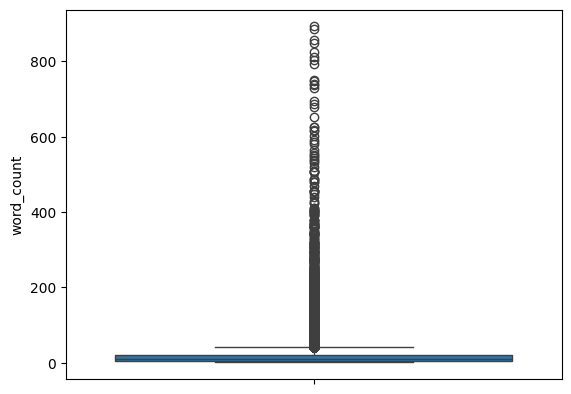

In [48]:
sns.boxplot(df['word_count'])

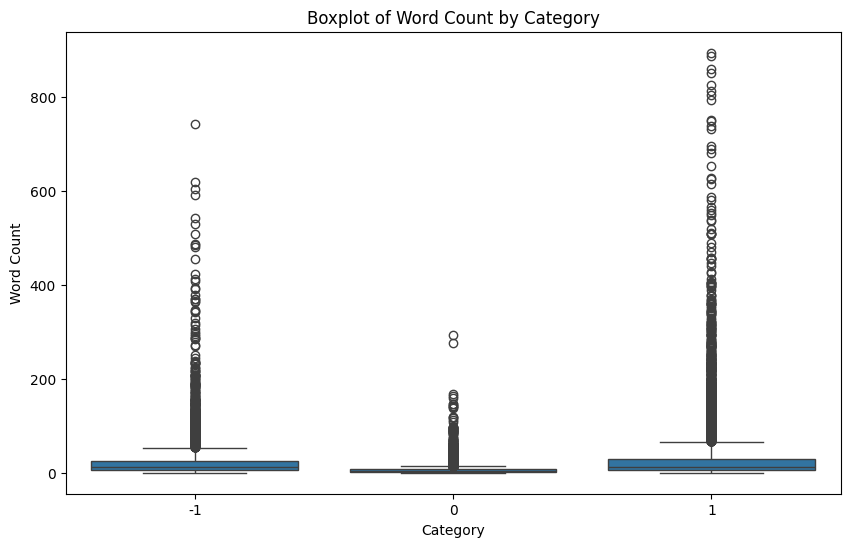

In [49]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

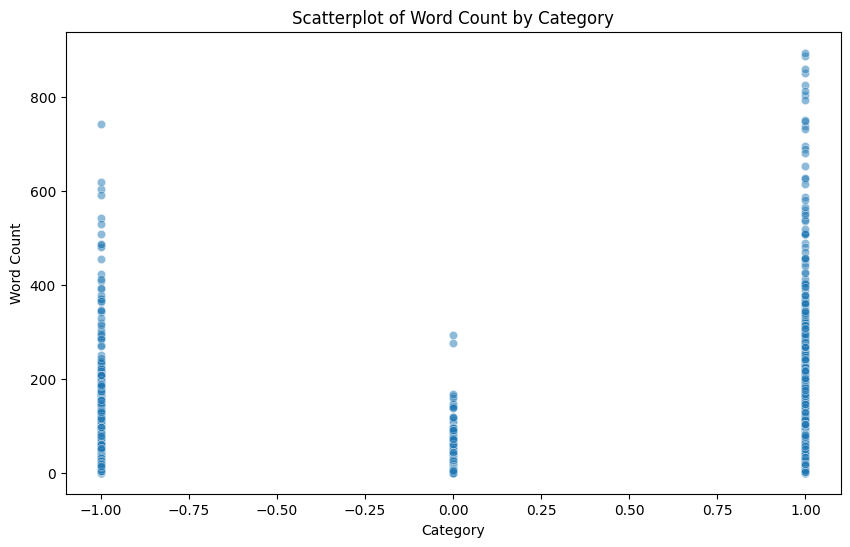

In [50]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

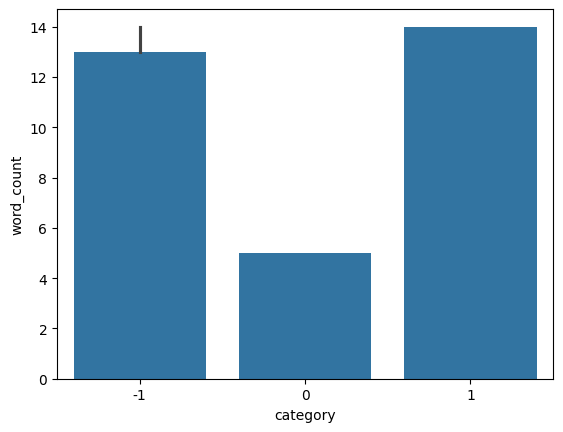

In [51]:
sns.barplot(df,x='category',y='word_count',estimator='median')

In [52]:
from nltk.corpus import stopwords

In [57]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohitrohda/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [65]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
10962,think lot lot lot lot lot lot lot lot lot lot ...,0,17,0
36310,let not pretend keralities ever vote bjp anyway,0,8,1
21504,living 2018 nigga living 1918,0,5,0
7333,best post read today thanks quality post,1,7,0
22946,chant loud repeat silently try rest life repor...,1,9,0


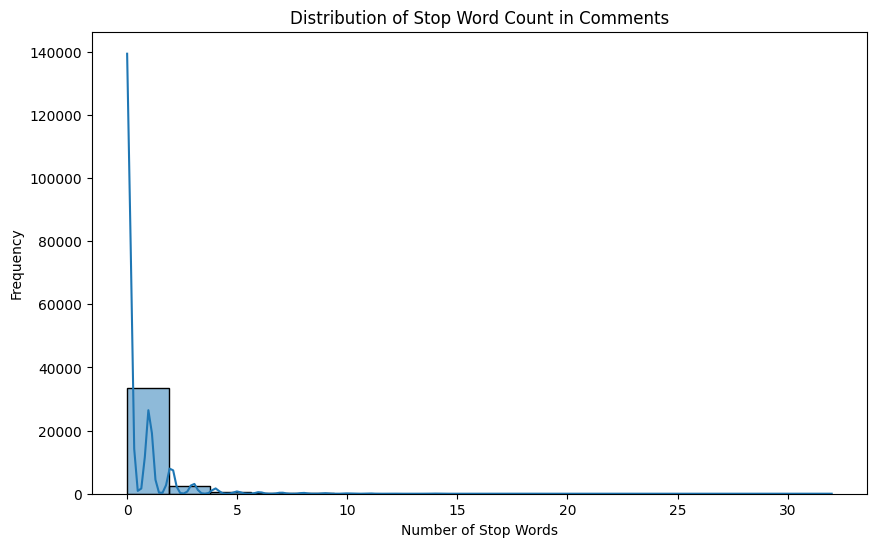

In [66]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


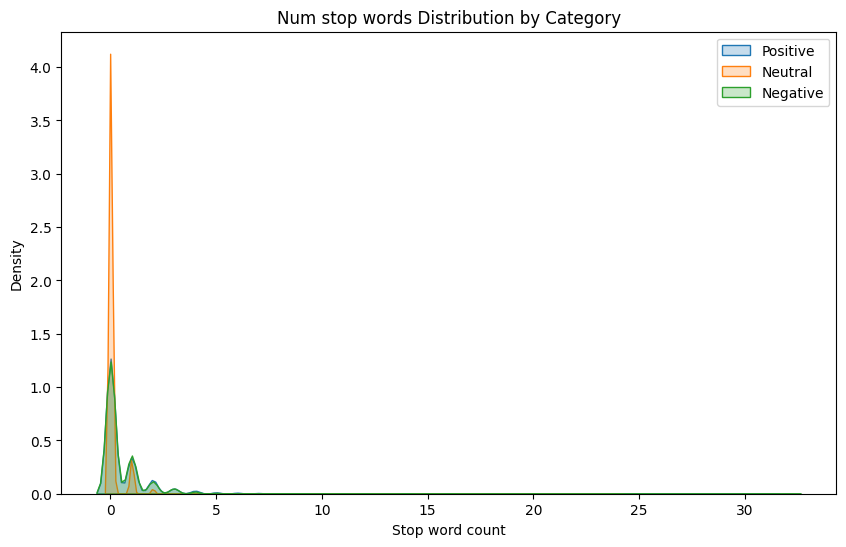

In [67]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [73]:
df.sample(10)

,clean_comment,category,word_count,num_stop_words
10278,credible opposition india bjp win 2019 guarant...,1,44,1
2772,cakeday aap fan let celebrate guy,0,6,0
4753,real question ever start,1,4,0
19750,alright 350rs free food attend rally money wor...,1,31,0
6126,irrespective result tune ndtv live body langua...,-1,17,0
18610,thing bother abt bjp every hear bjp mla north ...,0,18,0
12729,feel country taken hostage certain political p...,1,133,1
16934,hahaha retard cell guy hindutva virus fucking ...,-1,8,0
29126,hey bro calm situation household think youngst...,1,69,4
32428,popular not always right,1,4,1


<Axes: xlabel='category', ylabel='num_stop_words'>

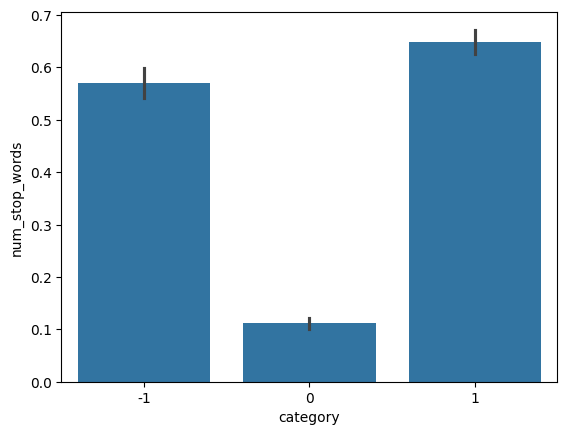

In [76]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='mean')


In [74]:
print(df['num_stop_words'].describe())
print(df['num_stop_words'].dtype)

count    36662.000000
mean         0.445748
std          1.231188
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         32.000000
Name: num_stop_words, dtype: float64
int64
